In [ ]:
/Users/mac/Dev/Large_project/data/tiny_coco_dataset/tiny_coco/train2017

In [4]:
from ultralytics import YOLO
import os
import cv2
import numpy as np
import json
import tqdm

def get_all_image_files(root_folder):
    # Các định dạng ảnh thường gặp
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff','.JPG'}
    image_files = []
    
    # Sử dụng os.walk để đệ quy qua tất cả các thư mục và file
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            # Kiểm tra xem file có phải là file ảnh không
            if os.path.splitext(filename)[1].lower() in image_extensions:
                image_files.append(os.path.join(dirpath, filename))
    return image_files

def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results

In [5]:
model=YOLO("yolov10x")

100%|██████████| 61.4M/61.4M [00:15<00:00, 4.14MB/s]


In [2]:
model=YOLO("yolov10x")
list_img=get_all_image_files("/Users/mac/Dev/Large_project/data/tiny_coco_dataset/tiny_coco/train2017")

In [10]:
img_test=cv2.imread(list_img[0])
img,results=predict_and_detect(model,img_test,[],0.3)


0: 640x480 2 forks, 19 spoons, 1 bowl, 5 chairs, 1 dining table, 535.8ms
Speed: 2.0ms preprocess, 535.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


In [60]:
names_dict = results[0].names
labels = list(names_dict.values())
grouped_labels = {
    'Person': ['person'],
    'Vehicle': ['bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat'],
    'Traffic Sign': ['traffic light', 'stop sign', 'fire hydrant', 'parking meter'],
    'Home': ['bench', 'chair', 'couch', 'bed', 'dining table', 'toilet', 'microwave', 'oven', 'refrigerator', 'sink', 'toaster', 'potted plant', 'clock', 'vase'],
    'Animals': ['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe'],
    'Food': ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake'],
    'Accessories': ['backpack', 'handbag', 'umbrella', 'tie', 'suitcase'],
    'Sports': ['frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket'],
    'Kitchen': ['bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl'],
    'Electronics': ['tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone'],
    'Tools & Other': ['scissors', 'book', 'teddy bear', 'hair drier', 'toothbrush']
}
import json
# Cấu trúc dữ liệu JSON
data = {
    "data": {
        "labels": labels,
        "group_label": grouped_labels
    }
}

# Lưu vào file JSON
with open("label.json", "w") as file:
    json.dump(data, file, indent=4)

print("Đã lưu dữ liệu vào file labels_grouped.json")


Đã lưu dữ liệu vào file labels_grouped.json


In [61]:
def sort_bb(results, top):
    areas_bb_with_labels = [] 
    labels = results.boxes.cls
    bbs = results.boxes.xyxy
    for bb, label in zip(bbs, labels):
        x, y, x_, y_ = bb
        area = (x_ - x) * (y_ - y)  
        area = int(area.item()) 
        areas_bb_with_labels.append((area, int(label.item()))) 
    areas_bb_with_labels = sorted(areas_bb_with_labels, key=lambda x: x[0], reverse=True)
    top_areas_bb_with_labels = areas_bb_with_labels[:top]   
    return top_areas_bb_with_labels

top_areas_bb = sort_bb(results[0],5)
top_areas_bb


[(227426, 60), (35997, 56), (21480, 56), (14539, 56), (7689, 44)]

In [ ]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([60., 44., 44., 56., 56., 44., 56., 44., 44., 56., 44., 44., 44., 56., 45., 44., 44., 42., 44., 44., 44., 44., 42., 44., 44., 44., 44., 44.])
conf: tensor([0.9426, 0.9086, 0.8959, 0.8843, 0.8750, 0.8463, 0.8159, 0.8123, 0.7995, 0.7973, 0.7735, 0.7508, 0.7399, 0.6911, 0.6531, 0.6457, 0.5876, 0.4939, 0.4803, 0.4335, 0.4223, 0.4139, 0.3986, 0.3945, 0.3590, 0.3343, 0.3307, 0.3302])
data: tensor([[3.5266e+01, 1.2539e+02, 4.7967e+02, 6.3714e+02, 9.4255e-01, 6.0000e+01],
        [3.7746e+02, 3.9384e+02, 4.7981e+02, 4.4111e+02, 9.0857e-01, 4.4000e+01],
        [3.1636e+02, 2.7096e+02, 3.9244e+02, 3.0078e+02, 8.9589e-01, 4.4000e+01],
        [9.8887e+01, 2.5739e+02, 1.9080e+02, 4.9108e+02, 8.8433e-01, 5.6000e+01],
        [3.6364e+01, 1.8946e+02, 1.1077e+02, 3.8489e+02, 8.7501e-01, 5.6000e+01],
        [2.2382e+02, 2.4644e+02, 3.3275e+02, 2.8603e+02, 8.4630e-01, 4.4000e+01],
        [1.8130e+02, 3.5645e+02, 3.0949e+02, 6.3726

In [38]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([60., 44., 44., 56., 56., 44., 56., 44., 44., 56., 44., 44., 44., 56., 45., 44., 44., 42., 44., 44., 44., 44., 42., 44., 44., 44., 44., 44.])
conf: tensor([0.9426, 0.9086, 0.8959, 0.8843, 0.8750, 0.8463, 0.8159, 0.8123, 0.7995, 0.7973, 0.7735, 0.7508, 0.7399, 0.6911, 0.6531, 0.6457, 0.5876, 0.4939, 0.4803, 0.4335, 0.4223, 0.4139, 0.3986, 0.3945, 0.3590, 0.3343, 0.3307, 0.3302])
data: tensor([[3.5266e+01, 1.2539e+02, 4.7967e+02, 6.3714e+02, 9.4255e-01, 6.0000e+01],
        [3.7746e+02, 3.9384e+02, 4.7981e+02, 4.4111e+02, 9.0857e-01, 4.4000e+01],
        [3.1636e+02, 2.7096e+02, 3.9244e+02, 3.0078e+02, 8.9589e-01, 4.4000e+01],
        [9.8887e+01, 2.5739e+02, 1.9080e+02, 4.9108e+02, 8.8433e-01, 5.6000e+01],
        [3.6364e+01, 1.8946e+02, 1.1077e+02, 3.8489e+02, 8.7501e-01, 5.6000e+01],
        [2.2382e+02, 2.4644e+02, 3.3275e+02, 2.8603e+02, 8.4630e-01, 4.4000e+01],
        [1.8130e+02, 3.5645e+02, 3.0949e+02, 6.3726

In [21]:
results[0].boxes.xyxy[0][0]

tensor(35.2659)

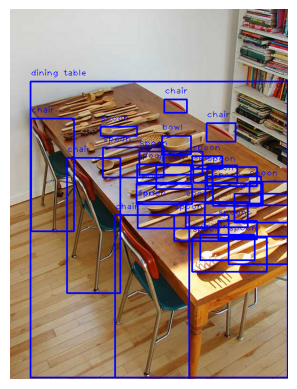

In [14]:
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()
